<a href="https://colab.research.google.com/github/peytonrunyan/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Peyton_Runyan_Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

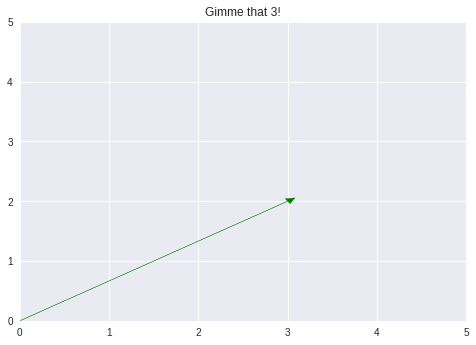

In [45]:
import matplotlib.pyplot as plt
import numpy as np

a = [3, 2]

plt.arrow(0,0, a[0], a[1],head_width=.1, head_length=0.1, color ='green')
plt.ylim(0, 5)
plt.xlim(0,5)
plt.title('Gimme that 3!')
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [7]:
from numpy.linalg import norm

b= np.array([17,-4,-2,1])

print(norm(b))
print('this represents the length of the vector')

17.60681686165901
this represents the length of the vector


## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [8]:
c= np.array([3,7,-2,12])
d= np.array([9,-7,4,6])

c.dot(d)

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [16]:
from numpy.linalg import inv

E = np.array([[7,4,2],[1,3,-1],[2,6,-4]])

print(E)
print('')
print(inv(E))
print('')
print(np.transpose(E))


[[ 7  4  2]
 [ 1  3 -1]
 [ 2  6 -4]]

[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]

[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [0]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

In [27]:
##### mean, var, std #####
print('customer mean: ' + str(np.mean(df['customers'])))
print('customer variance: ' + str(np.std(df['customers'])))
print('customer std dev: ' + str(np.std(df['customers'])) + '\n')

print('snow mean: ' + str(np.mean(df['snow'])))
print('snow variance: ' + str(np.std(df['snow'])))
print('snow std dev: ' + str(np.std(df['snow'])) + '\n')

customer mean: 1135.7142857142858
customer variance: 290.95199127087926
customer std dev: 290.95199127087926

snow mean: 2.7142857142857144
snow variance: 2.7105237087157534
snow std dev: 2.7105237087157534



## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [0]:
#Kinda depends on how you want to define 'comparable'
#In general, the units are different, which makes comparing them a no go 

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [29]:
np.cov((df['customers'],df['snow']))

array([[9.87619048e+04, 6.70238095e+02],
       [6.70238095e+02, 8.57142857e+00]])

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [0]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

In [0]:
# Only numeric columns in dataframe for pasing to PCA

X = df.drop('Country', axis=1)
X.head()

In [34]:
import sklearn.preprocessing
scaler = sklearn.preprocessing.StandardScaler()

names = X.columns

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=names)

X_scaled.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,0.104998,-0.051917,-0.017495,-0.644322,0.658275,-0.138303,-0.632429,0.644585,0.737407,-0.450076,0.863312,-0.259546,0.377736,-0.336265,0.805477,-0.435231,0.130551
1,0.841823,1.609440,-1.277169,1.679463,0.535805,0.968122,1.535899,1.152440,0.929297,0.435696,1.093528,1.198856,1.401682,0.084066,1.171603,-1.404236,1.547958
2,0.716563,-0.467257,-0.227441,-0.855575,0.535805,0.746837,-1.097071,-0.332059,-0.057567,-1.335847,-0.709834,0.543811,-0.496364,1.513193,-0.878702,1.190727,-0.540853
3,-1.663384,-1.090266,1.522105,-0.179565,-1.729885,-1.576656,0.193601,-1.464967,-1.609137,1.350227,-1.247006,-1.483121,-1.283054,-1.260994,-1.098378,0.648741,-1.137656


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [37]:
##### X_scaled

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

components = pd.DataFrame(pca.components_,columns=X_scaled.columns,index = ['PC-1','PC-2'])

print("PC Composition - Just because it's neat")
print(components.transpose())

PC Composition - Just because it's neat
                        PC-1      PC-2
Alcoholic Drinks   -0.255095  0.232318
Beverages          -0.277475 -0.137738
Carcass_Meat        0.285629 -0.077170
Cereals            -0.178440 -0.329029
Cheese             -0.245721  0.247080
Confectionery      -0.252758  0.211057
Fats_and_Oils      -0.127195 -0.400545
Fish               -0.286118 -0.011006
Fresh_Fruit        -0.278905  0.081746
Fresh_Potatoes      0.097759 -0.454688
Fresh_Veg          -0.265450 -0.096486
Other_Meat         -0.264811  0.136107
Other_Veg          -0.287086 -0.092823
Processed_Potatoes -0.120738  0.410361
Processed_Veg      -0.257678 -0.153960
Soft_Drinks         0.227720  0.293240
Sugars             -0.281101 -0.136841


In [48]:
principalDf

,principal component 1,principal component 2
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


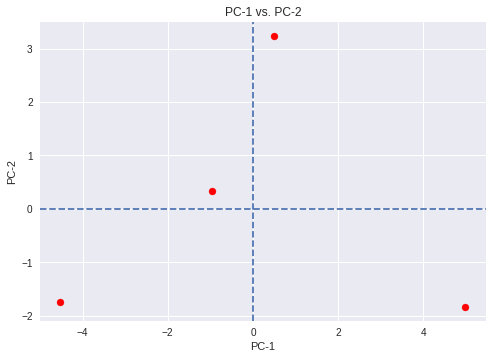

In [57]:
plt.scatter(principalDf['principal component 1'], 
            principalDf['principal component 2'],
           color = 'red')

plt.axhline(0, linestyle='--')
plt.axvline(0,linestyle='--')

plt.title('PC-1 vs. PC-2')
plt.xlabel('PC-1')
plt.ylabel('PC-2')

plt.show()

In [0]:
#Kinda underwhelming but I guess there's just 4 observations

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [40]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
##### df = points

points_scaled = scaler.fit_transform(points)

points_scaled = pd.DataFrame(points_scaled, columns=['Cooler name 1','Cn2'])

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(points_scaled)
points_scaled_kmeans = kmeans.predict(points_scaled)

"""
Used the eye test for selecting 5 clusters. Originally used 
4, but blue looked like it was too spread, so I added a fifth
and it fixed it (what's yellow now was blue) so I stuck with it
"""


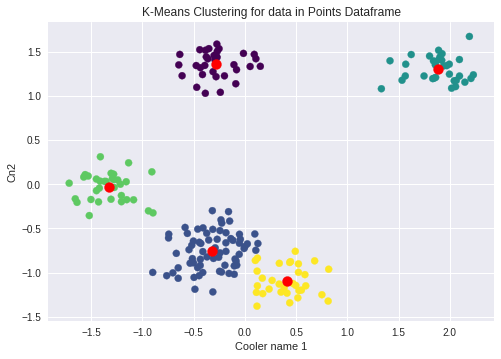

In [54]:
plt.scatter(points_scaled['Cooler name 1'], points_scaled['Cn2'], 
            c=points_scaled_kmeans, s=50, cmap = 'viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)
plt.title('K-Means Clustering for data in Points Dataframe')
plt.xlabel('Cooler name 1')
plt.ylabel('Cn2');